<a href="https://www.kaggle.com/code/somkeneuzowulu/seattle-weather-prediction-85-accuracy?scriptVersionId=127924307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Seattle Weather Prediction (2012-2015)
In this article, we will build two classification Machine learning models (**Random_Forest_Classifier** and **MLPClassifier**). The seattle Weather dataset consists of five features (date, precipitation, temp_min, temp_max and wind) and a Target (classified into five outputs: Drizzle, fog, rain, snow and sun).

Here are the few steps we will take to analyze the data and build the models:
1. We will split the dataset into *training dataset* (X_train, y_train) and *testing data* (X_test,y_test).
2. We will perform feature engineering by creating additional features from the existing features. Adding few more features will help to build a better model.
3. We will build the two models with the training dataset, score each of them and display their Confusion_matrix to see how well the models predicts the testing dataset.

We will start by reading the dataset:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/seattle-weather.csv


We will copy the dataset file directory and create a dataframe and have a pairplot of the features just  to visualize how each pair of the features correlate:

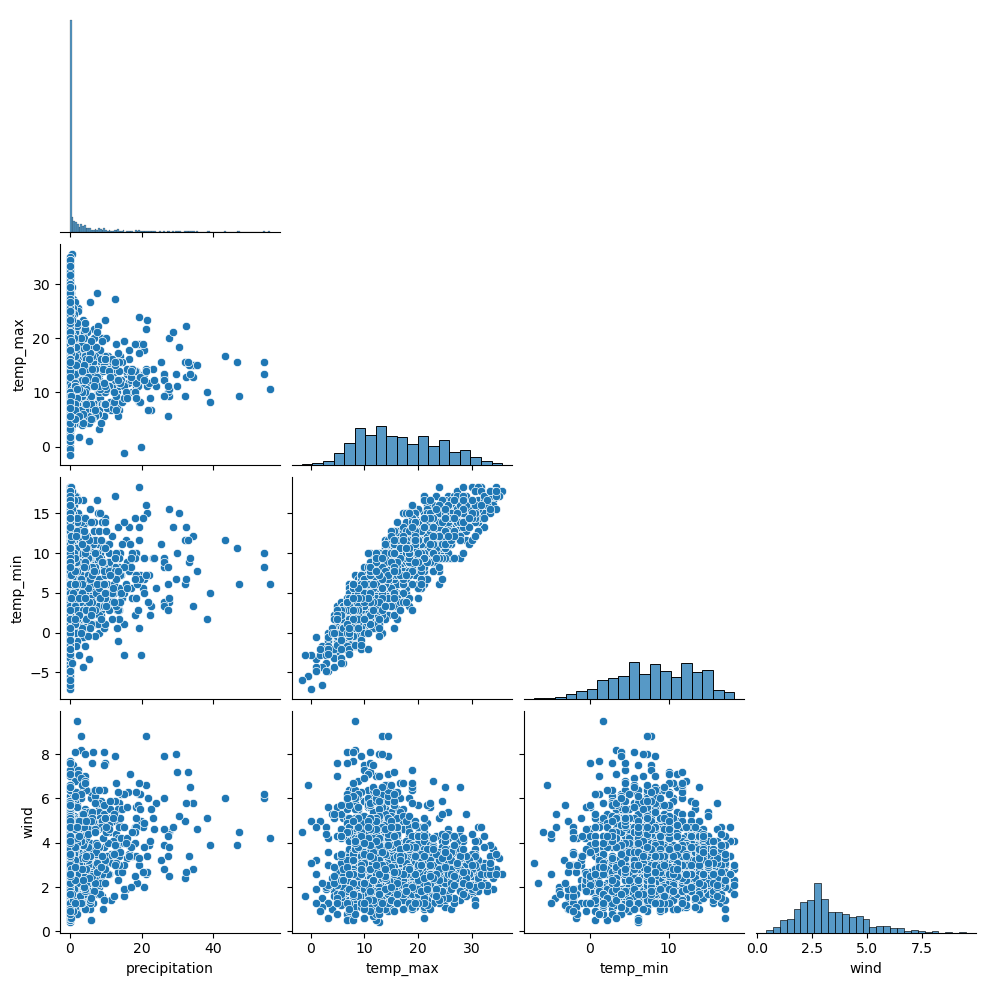

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('/kaggle/input/weather-prediction/seattle-weather.csv')
df['date'] = pd.to_datetime(df['date']) #converts 'date' datatype to a date datatype
sns.pairplot(df, corner=True)

## Feature Engineering
We will be creating few more features ('weather_label', 'temp_range' and 'season'):

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode the season
season_map = {1:'Winter',
              2:'Winter',
              3:'Spring',
              4:'Spring',
              5:'Spring',
              6:'Summer',
              7:'Summer',
              8:'Summer',
              9:'Autumn',
              10:'Autumn',
              11:'Autumn',
              12:'Winter'
              }

df['season'] = df['date'].dt.month.map(season_map) # A 'season' feature that encodes the 'date' datatype into four seasons
df = pd.get_dummies(df, columns=['season']) # categorizes the season values into four new 'season' features
# Encode the weather label
le = LabelEncoder()
df['weather_label']=le.fit_transform(df['weather']) # creates a new feature that encodes the five weather strings into categorical values
df['temp_range'] = df['temp_max'] - df['temp_min'] # creates a new feature from the difference between max and min temperature
feature =['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'temp_range' ,'season_Autumn', 'season_Spring', 'season_Summer', 'season_Winter']
feature.remove('date')

df[feature]

,precipitation,temp_max,temp_min,wind,temp_range,season_Autumn,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,7.8,0,0,0,1
1,10.9,10.6,2.8,4.5,7.8,0,0,0,1
2,0.8,11.7,7.2,2.3,4.5,0,0,0,1
3,20.3,12.2,5.6,4.7,6.6,0,0,0,1
4,1.3,8.9,2.8,6.1,6.1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2.7,0,0,0,1
1457,1.5,5.0,1.7,1.3,3.3,0,0,0,1
1458,0.0,7.2,0.6,2.6,6.6,0,0,0,1
1459,0.0,5.6,-1.0,3.4,6.6,0,0,0,1


In [4]:
df['weather_label']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_label, Length: 1461, dtype: int64

## Building the Model
We will start by creating an array variable of X(features) and y(target):

In [5]:
X = df[feature].values
y = df['weather_label'].values

> ## Random_Forest Model and its Confusion_Matrix:

Score:  0.8579234972677595
drizzle  : 15
fog  : 27
rain  : 165
snow  : 5
sun  : 154


Text(0.5, 1.0, 'Random_Forest')

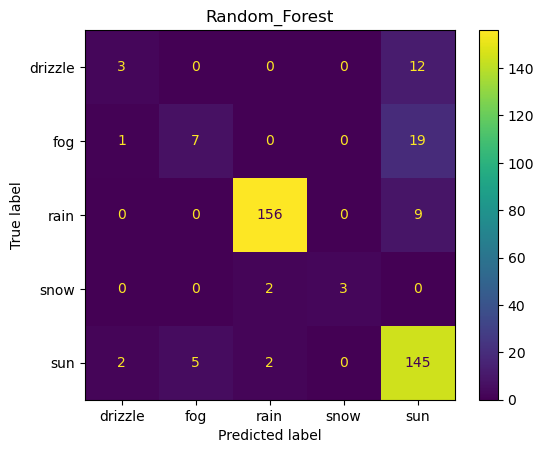

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Splitting X and y into training and testing Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True)

rf =RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Score: ", rf.score(X_test,y_test))

#Confusion_Matrix of the Random Forest
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
confu_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confu_mat, display_labels=le.classes_)
disp.plot()

for class_number,count in enumerate(np.bincount(y_test)):
    print(le.classes_[class_number], " :", count)
plt.title("Random_Forest")
#plt.savefig("Seattle_Con.pdf")

> ## MLPClassifier Model and its Confusion_matrix:

Score:  0.8387978142076503
drizzle  : 15
fog  : 27
rain  : 165
snow  : 5
sun  : 154


Text(0.5, 1.0, 'Neural_Network')

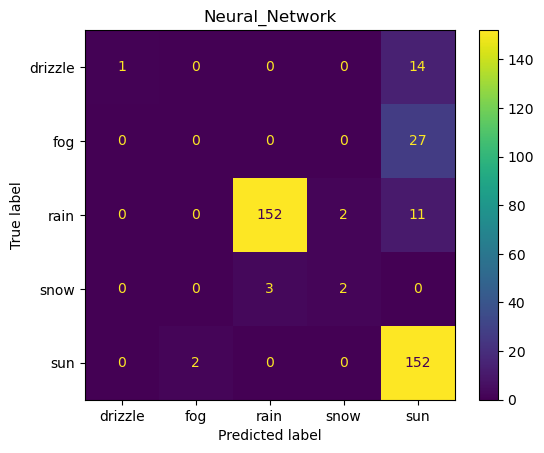

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

y_pred2 = mlp.predict(X_test)
print('Score: ', mlp.score(X_test,y_test))

#Confusion_matrix for Neural_network
confu_mat2 = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confu_mat2, display_labels=le.classes_)
disp.plot()

for class_number,count in enumerate(np.bincount(y_test)):
    print(le.classes_[class_number], " :", count)
plt.title("Neural_Network")
#plt.savefig("Seattle_Con2.pdf")

After predicting the testing Dataset, the scores of each model shows that the **RandomForestClassifier** has a higher prediction accuracy. By adjusting some of the attributes of each of the model or adding more features, one can improve the accuracy score of each model.

However, there are many other classification Machine learning models that will give a higher accuracy score on testing dataset. Please like, comment and contribute to improve the models generated for this dataset. Thanks.